### Tumor instance saving tests in avascular and vascular phases

In [1]:
from TumorAngiogenesisSynchro import Tissue
import numpy as np
import matplotlib.pyplot as plt
from AngiogenesisModule import AngiogenesisModule
from TumorAngiogenesisSynchro import CellType

### Tumor instance save

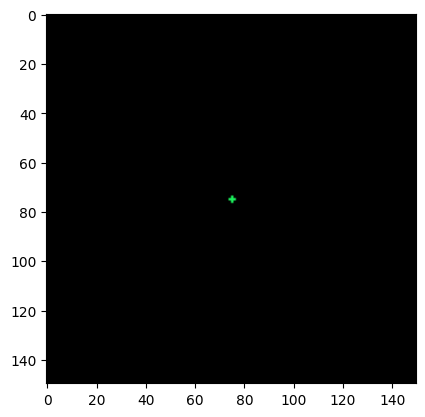

In [2]:
automatonWidth = 150
automatonHeight = 150
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)


#Initialize tissue
tissue = Tissue(automatonWidth,automatonHeight)

#Add proliferating cells in the center of the automaton
tissue.addProliferatingCell(centerX, centerY, False, 0)
tissue.addProliferatingCell(centerX + 1, centerY, False, 0)
tissue.addProliferatingCell(centerX - 1, centerY, False, 0)
tissue.addProliferatingCell(centerX, centerY - 1, False, 0)
tissue.addProliferatingCell(centerX, centerY + 1, False, 0)

plt.figure()
plt.imshow(tissue.getPicture(True))


100%|█████████████████████████████████████████| 200/200 [00:44<00:00,  4.49it/s]


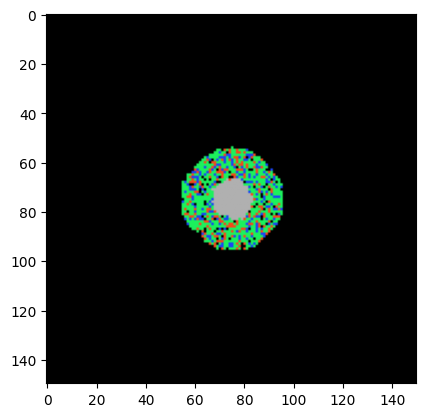

In [3]:
#Evolve 300 steps  without vasculature
nSteps = 200
tissue.evolveTissueInitially(nSteps, True, True, True)

plt.figure()
plt.imshow(tissue.getPicture(True))

In [4]:
#Now let's save the instance
fileName = "avascular_instance.pkl"
tissue.exportTumorInstance(fileName)

Tumor object saved to avascular_instance.pkl


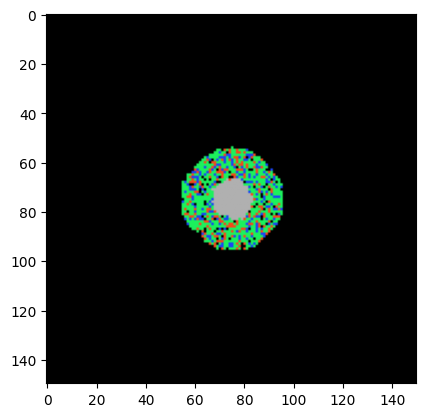

In [5]:
#Let's try opening it 
fileName = "avascular_instance.pkl"
#Create a tissue object skeleton
tissue = Tissue(150,150)
#Open the object instance file
tissue = tissue.importTumorInstance(fileName)
plt.figure()
plt.imshow(tissue.getPicture(True))


It seems to be working. Let's evolve a blood vessel network and save the version of the tumor holding this sample network (This is just for example purposes really, and to verify that everything works properly).

I assume adjusting the parameters for this part will take a whole day probably.

### Vascular tumor save test

In [6]:
#First initialize the vascular phase
tissue.setVascularPhase()
#Then it is as simple as continuing the evolution of the tumor.
nSteps = 200
tissue.continueTumorEvolution(nSteps, True, True, True, True)

100%|█████████████████████████████████████████| 200/200 [03:45<00:00,  1.13s/it]


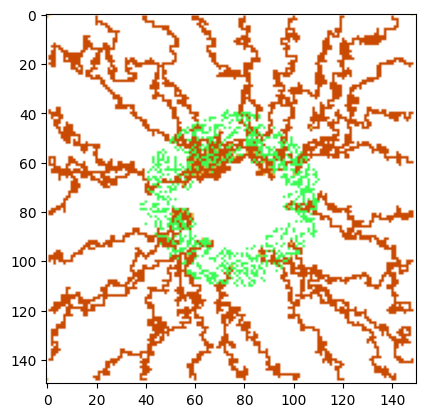

In [7]:
plt.figure()
plt.imshow(tissue.networkMovie[:,:,:,-2])

In [8]:
#Save the vascular tumor
fileName = "vascular_tumor.pkl"
tissue.exportTumorInstance(fileName)

Tumor object saved to vascular_tumor.pkl


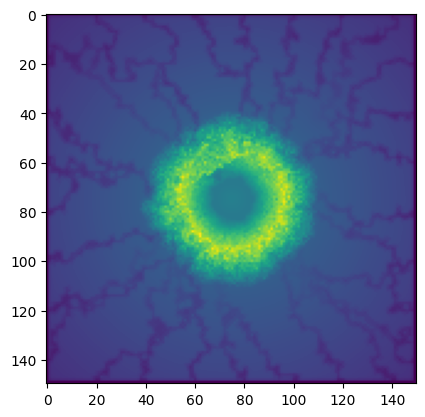

In [9]:
plt.imshow(tissue.angiogenesisModule.cMatrix)

In [10]:
tissue.angiogenesisModule.cMatrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17107802, 0.20803088, ..., 0.21023859, 0.17287837,
        0.        ],
       [0.        , 0.20803555, 0.25080088, ..., 0.25333205, 0.21012865,
        0.        ],
       ...,
       [0.        , 0.21062662, 0.25377081, ..., 0.25639443, 0.21280026,
        0.        ],
       [0.        , 0.17321725, 0.21051175, ..., 0.21280029, 0.17508865,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])